##### Build a shallow neural network to classify MNIST digits
* 60000 images to train on
* 10000 images to test on
* 0,1...,9
* Every single one of these digits in the dataset is a square image that is 28*28 --> 784 pixels

#### Setting seed for reproduciability

In [1]:
import numpy as np
np.random.seed(42)

#### Load Dependencies

* We're going to flat the image so that we take the first row on that image and then the second row pixels of that image and so on .
* We're going to sequence them 0 through 27 and then the next row of pixels is 2 through 56...
* We're simply making it into an array of length 783
* For the neural that we're building, it has 784 inputs
* We're going to feed this input layer to a hidden layer 
* We're going to choose 64 neurons in this hidden layer
* For the output layer, we simply have 10 outputs(digits)

In [2]:
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0:99]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3], dtype=uint8)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

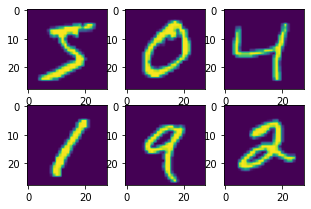

In [12]:
plt.figure(figsize=(5,5))

for k in range(6):
    plt.subplot(3,3, k+1)
    plt.imshow(X_train[k])
    
plt.show()

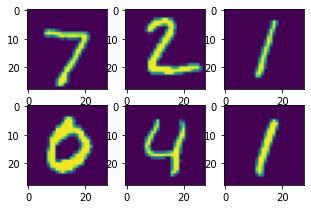

In [13]:
plt.figure(figsize=(5,5))

for k in range(6):
    plt.subplot(3,3, k+1)
    plt.imshow(X_test[k])
    
plt.show()

In [14]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
y_test[0]

7

#### Preprocess Data

In [16]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [17]:
X_train /= 255
X_test /= 255

In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
import tensorflow as tf


n_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=n_classes)

In [21]:
y_test.shape

(10000, 10)

In [23]:
y_test[0] # It's 7 as shown above

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design Neural Network Architecture

In [24]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### Understanding the parameters

In [26]:
# We have in the input layer 784 neuons and in the hidden layer 64
(64*784) 

50176

In [27]:
# We add the Bias of each neuron in the hidden layer
(64*784)+64

50240

In [28]:
# For the output layer we have 10 neurons
(10*64)+10

650

In [29]:
# After aggregation, we got the nb 50890 of trainable params as shown in the summary
50176+64+650

50890

#### Configure Model

In [30]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#### Train the Model

In [31]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0913 - accuracy: 0.1020 - val_loss: 0.0910 - val_accuracy: 0.1044
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.1106 - val_loss: 0.0906 - val_accuracy: 0.1138
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.1245 - val_loss: 0.0903 - val_accuracy: 0.1321: 0s - loss: 0.0905 - accura
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.1475 - val_loss: 0.0899 - val_accuracy: 0.1636
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.1893 - val_loss: 0.0896 - val_accuracy: 0.2177
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.2453 - val_loss: 0.0893 - val_accuracy: 0.2785
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.2999 - val_loss: 0

469/469 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.5155 - val_loss: 0.0677 - val_accuracy: 0.5207
Epoch 57/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.5217 - val_loss: 0.0672 - val_accuracy: 0.5270: 0s - loss: 0.0680 - accura
Epoch 58/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.5268 - val_loss: 0.0668 - val_accuracy: 0.5335
Epoch 59/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.5319 - val_loss: 0.0663 - val_accuracy: 0.5384
Epoch 60/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.5375 - val_loss: 0.0658 - val_accuracy: 0.5438
Epoch 61/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.5436 - val_loss: 0.0653 - val_accuracy: 0.5498
Epoch 62/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.5503 - val_loss: 0.0649 

469/469 [==============================] - 1s 2ms/step - loss: 0.0465 - accuracy: 0.7422 - val_loss: 0.0457 - val_accuracy: 0.7503
Epoch 112/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.7441 - val_loss: 0.0454 - val_accuracy: 0.7524
Epoch 113/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.7465 - val_loss: 0.0451 - val_accuracy: 0.7545
Epoch 114/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.7481 - val_loss: 0.0448 - val_accuracy: 0.7576
Epoch 115/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0453 - accuracy: 0.7502 - val_loss: 0.0445 - val_accuracy: 0.7605
Epoch 116/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0450 - accuracy: 0.7521 - val_loss: 0.0442 - val_accuracy: 0.7623
Epoch 117/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0447 - accuracy: 0.7540 - val_loss: 0.0439 - val_accuracy: 0.7641

469/469 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.8339 - val_loss: 0.0324 - val_accuracy: 0.8407
Epoch 168/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.8347 - val_loss: 0.0323 - val_accuracy: 0.8416
Epoch 169/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0330 - accuracy: 0.8353 - val_loss: 0.0321 - val_accuracy: 0.8428
Epoch 170/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.8364 - val_loss: 0.0319 - val_accuracy: 0.8440
Epoch 171/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0327 - accuracy: 0.8369 - val_loss: 0.0318 - val_accuracy: 0.8449
Epoch 172/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.8378 - val_loss: 0.0316 - val_accuracy: 0.8457
Epoch 173/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.8384 - val_loss: 0.0314 - val_accuracy: 0.8464

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.8619


[0.02781844139099121, 0.8618999719619751]